## Assignment 4

In [250]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md

In [251]:
data = pd.read_csv('StudentsPerformance.csv')

In [252]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


### Question:
Case Study on Measures of Central Tendency and Dispersion
An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information.
1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on:
a) Gender
b) Test preparation course
4. What do you think about the scoring variation for math, reading and writing based on:
a) Gender
b) Test preparation course
5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.


##### 1. Find out how many males and females participated in the test.

In [253]:
female, male = data['gender'].value_counts()
md(f"count of men = {male}, count of women = {female}")


count of men = 482, count of women = 518

##### 2. What do you think about the students' parental level of education?

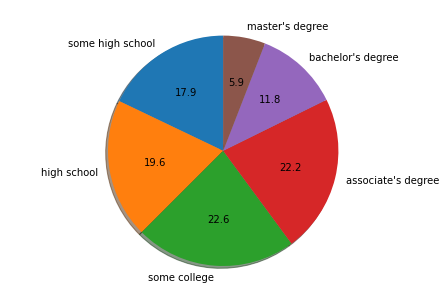

In [254]:
################ List containing count of unique values of column - 'parental level of education' ################
keys = list(data['parental level of education'].unique())
values = list()
for i in keys:
    values.append(data['parental level of education'].value_counts()[i])
#--------------------------------------------------------------------------------------------------------------#

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = keys
value = values
total = sum(values)
ax.pie(value, labels = label, autopct='%.1f', shadow=True, startangle=90)
plt.show()

In [255]:
################ adding total marks column to the main DataFrame - 'data'################
data['total'] = data['math score'] + data['reading score'] + data['writing score']

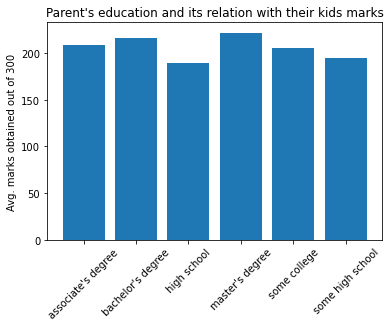

In [256]:
parents_and_totalmarks = data[['parental level of education','total']]
parents_edu_relation_with_kids_marks = parents_and_totalmarks.groupby('parental level of education')['total'].mean()

################ List containing average of total marks of kids ################
keys = list(data['parental level of education'].unique())
keys.sort()
values = list()
for i in parents_edu_relation_with_kids_marks:
    values.append(i)
#-------------------------------------------------------------------------------#

plt.bar(keys, values)
plt.title("Parent's education and its relation with their kids marks")
plt.xticks(rotation=45)

plt.ylabel('Avg. marks obtained out of 300')
plt.show()

##### 3. Who scores the most on average for math, reading and writing based on:
a) Gender
b) Test preparation course

###### 3.a) Gender

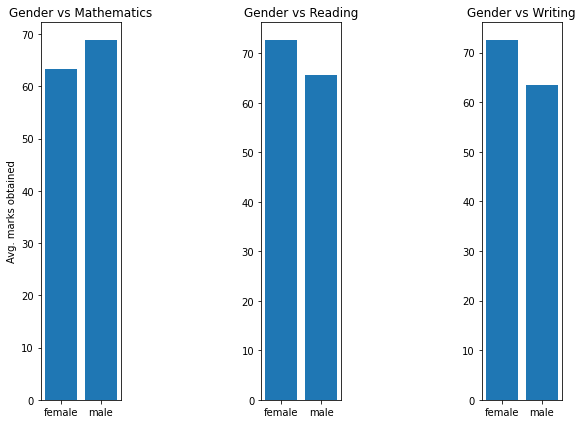

In [257]:
test_and_avg_math = data[['gender','math score']].groupby('gender')['math score'].mean()
test_and_avg_reading = data[['gender','reading score']].groupby('gender')['reading score'].mean()
test_and_avg_writing = data[['gender','writing score']].groupby('gender')['writing score'].mean()

keys = list(data['gender'].unique())
keys.sort()

values_math = list()
for i in test_and_avg_math:
    values_math.append(i)
    
values_reading = list()
for i in test_and_avg_reading:
    values_reading.append(i)
    
values_writing = list()
for i in test_and_avg_writing:
    values_writing.append(i)

plt.figure(figsize = (8,6))

plt.subplot(1,5,1) 
plt.bar(keys, values_math)
plt.title("Gender vs Mathematics")
plt.xticks(rotation=0)
plt.ylabel('Avg. marks obtained')

plt.subplot(1,5,3)
plt.bar(keys, values_reading)
plt.title("Gender vs Reading")
plt.xticks(rotation=0)

plt.subplot(1,5,5)
plt.bar(keys, values_writing)
plt.title("Gender vs Writing")
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()

###### 3.b) Test preparation course

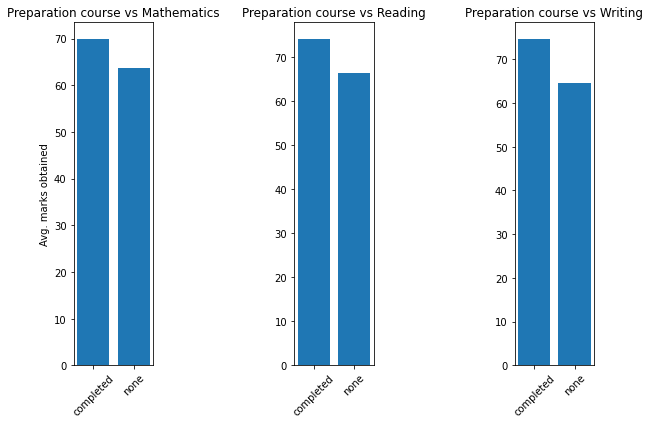

In [258]:
course_and_avg_math = data[['test preparation course','math score']].groupby('test preparation course')['math score'].mean()
course_and_avg_reading = data[['test preparation course','reading score']].groupby('test preparation course')['reading score'].mean()
course_and_avg_writing = data[['test preparation course','writing score']].groupby('test preparation course')['writing score'].mean()

keys = list(data['test preparation course'].unique())
keys.sort()

values_math = list()
for i in course_and_avg_math:
    values_math.append(i)
    
values_reading = list()
for i in course_and_avg_reading:
    values_reading.append(i)
    
values_writing = list()
for i in course_and_avg_writing:
    values_writing.append(i)

plt.figure(figsize = (8,6))

plt.subplot(1,5,1) 
plt.bar(keys, values_math)
plt.title("Preparation course vs Mathematics")
plt.xticks(rotation=45)
plt.ylabel('Avg. marks obtained')

plt.subplot(1,5,3)
plt.bar(keys, values_reading)
plt.title("Preparation course vs Reading")
plt.xticks(rotation=45)

plt.subplot(1,5,5)
plt.bar(keys, values_writing)
plt.title("Preparation course vs Writing")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

##### 4. What do you think about the scoring variation for math, reading and writing based on:

###### 4.a) Gender

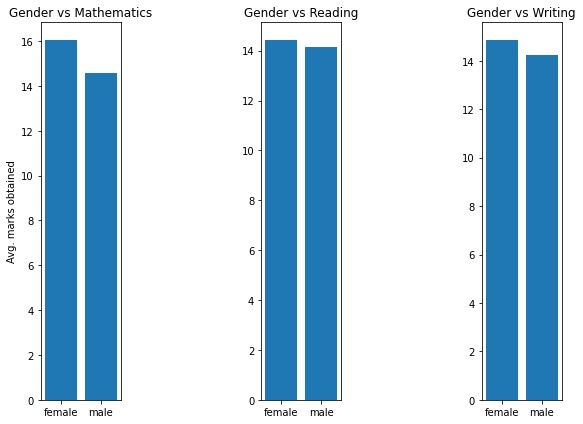

From the graph, we can see that male students are more consistent in Mathematics whereas female candidates are more consistent in Reading and Writing.

In [259]:
test_and_avg_math = data[['gender','math score']].groupby('gender')['math score'].std()
test_and_avg_reading = data[['gender','reading score']].groupby('gender')['reading score'].std()
test_and_avg_writing = data[['gender','writing score']].groupby('gender')['writing score'].std()

keys = list(data['gender'].unique())
keys.sort()

values_math = list()
for i in test_and_avg_math:
    values_math.append(i)
    
values_reading = list()
for i in test_and_avg_reading:
    values_reading.append(i)
    
values_writing = list()
for i in test_and_avg_writing:
    values_writing.append(i)

plt.figure(figsize = (8,6))

plt.subplot(1,5,1) 
plt.bar(keys, values_math)
plt.title("Gender vs Mathematics")
plt.xticks(rotation=0)
plt.ylabel('Avg. marks obtained')

plt.subplot(1,5,3)
plt.bar(keys, values_reading)
plt.title("Gender vs Reading")
plt.xticks(rotation=0)

plt.subplot(1,5,5)
plt.bar(keys, values_writing)
plt.title("Gender vs Writing")
plt.xticks(rotation=0)


plt.tight_layout()
plt.show()

md("From the graph, we can see that male students are more consistent in Mathematics whereas female candidates are more consistent in Reading and Writing.")

###### 4.b) Test preparation course

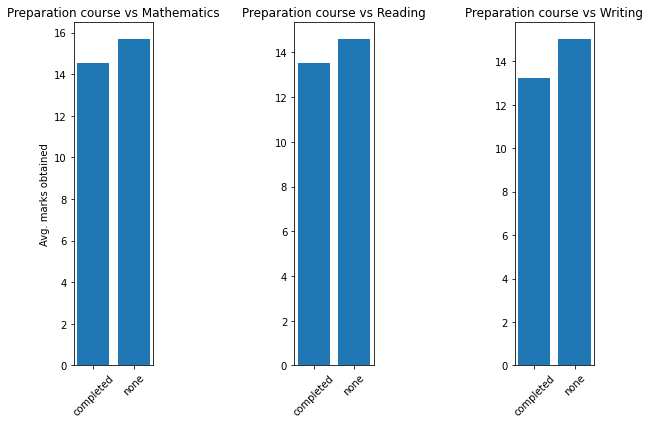

From the graph, we can see that students score better marks after attending the course.

In [260]:
course_and_avg_math = data[['test preparation course','math score']].groupby('test preparation course')['math score'].std()
course_and_avg_reading = data[['test preparation course','reading score']].groupby('test preparation course')['reading score'].std()
course_and_avg_writing = data[['test preparation course','writing score']].groupby('test preparation course')['writing score'].std()

keys = list(data['test preparation course'].unique())
keys.sort()

values_math = list()
for i in course_and_avg_math:
    values_math.append(i)
    
values_reading = list()
for i in course_and_avg_reading:
    values_reading.append(i)
    
values_writing = list()
for i in course_and_avg_writing:
    values_writing.append(i)

plt.figure(figsize = (8,6))

plt.subplot(1,5,1) 
plt.bar(keys, values_math)
plt.title("Preparation course vs Mathematics")
plt.xticks(rotation=45)
plt.ylabel('Avg. marks obtained')

plt.subplot(1,5,3)
plt.bar(keys, values_reading)
plt.title("Preparation course vs Reading")
plt.xticks(rotation=45)

plt.subplot(1,5,5)
plt.bar(keys, values_writing)
plt.title("Preparation course vs Writing")
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

md("From the graph, we can see that students score better marks after attending the course.")

##### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [261]:
a = int(.25 * data.shape[0]) #25% of students - count, .shape[0] returns the number of rows
top_25_math_marks = data.nlargest(a,'math score')

top_25_math_marks['bonus'] = data['math score']*.075 # A 7.5% of math score increase in the final score

top_25_math_marks['final score'] = top_25_math_marks['total'] + top_25_math_marks['bonus']

top_25_math_marks

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,bonus,final score
515,female,group E,some college,standard,none,100,92,97,289,7.500,296.500
516,female,group E,bachelor's degree,standard,none,100,100,100,300,7.500,307.500
517,female,group E,associate's degree,standard,none,100,100,100,300,7.500,307.500
996,male,group A,some college,standard,completed,100,96,86,282,7.500,289.500
997,male,group D,some college,standard,completed,100,97,99,296,7.500,303.500
...,...,...,...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86,249,5.775,254.775
429,female,group E,some high school,standard,none,77,79,80,236,5.775,241.775
849,male,group A,bachelor's degree,standard,none,77,67,68,212,5.775,217.775
850,male,group C,associate's degree,free/reduced,none,77,67,64,208,5.775,213.775
